ขนาดบ้าน = 1500, จะใช้ไฟประมาณ = 1371.36
ขนาดบ้าน = 2000, จะใช้ไฟประมาณ = 1781.86
R-Squared = 0.982


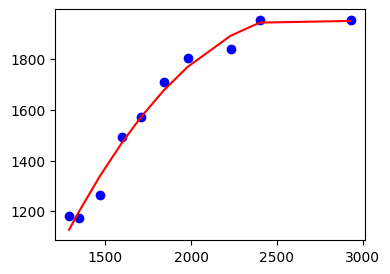

In [1]:
#example 4-14

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(r'data\electricity-consumptions.csv')
#with pd.option_context('display.max_rows', 6): display(df)

x = df['home_size']
y = df['kilowatt_hours_per_month']

pf = PolynomialFeatures(degree=3) 
x = np.array(x).reshape(-1, 1)
x_poly= pf.fit_transform(x) 

model = LinearRegression()  
model.fit(x_poly, y)  

#ทำนายผลสำหรับบ้านขนาด 1500 และ 2000
x_predict = [[1500], [2000]]  
y_predict = model.predict(pf.transform(x_predict))

for (i, x_p) in enumerate(x_predict):
    kw = '{:.2f}'.format(y_predict[i])
    print(f'ขนาดบ้าน = {x_p[0]}, จะใช้ไฟประมาณ = {kw}')

score = model.score(x_poly, y)
print('R-Squared =', '{:.3f}'.format(score))

#เนื่องจากเราไม่ได้แบ่งชุด Train/Test
#จึงทำนายผลจากข้อมูลทั้งหมดเพื่อวาดกราฟ
y_predict_all = model.predict(x_poly)

plt.figure(figsize=(4, 3))
plt.scatter(x, y, color='b')  
plt.plot(x, y_predict_all, color='r')  
plt.show() 